In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Global parameters for consistency
SAMPLING_RATE = 1000  # Hz
DURATION = 2.0        # seconds
N_SAMPLES = int(SAMPLING_RATE * DURATION)
# Time vector
t = np.linspace(0, DURATION, N_SAMPLES, endpoint=False)

# --- Helper function for plotting ---
def plot_signal_and_spectrum(t, signal, fs, title_prefix, N_dft=None, N_dtft=8192):
    """
    A helper function to generate the required plots for each signal.
    - Time domain waveform
    - DTFT (approximated with a large FFT)
    - DFT
    """
    plt.figure(figsize=(15, 10))

    # 1. Plot Time-Domain Waveform
    plt.subplot(3, 1, 1)
    plt.plot(t, signal)
    plt.title(f'{title_prefix}: Time-Domain Representation')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.xlim(0, DURATION)

    # --- Frequency-Domain Analysis ---
    # Common parameters for both DTFT and DFT
    if N_dft is None:
        N_dft = len(signal) # DFT points = number of samples

    # 2. Compute and Plot DTFT (Approximation using a zero-padded FFT)
    # The DTFT is a continuous function. We approximate it by computing the DFT
    # with a large number of points (zero-padding) to get a high-resolution spectrum.
    X_dtft = np.fft.fft(signal, n=N_dtft)
    freq_dtft = np.fft.fftfreq(N_dtft, d=1/fs)
    # Shift the zero-frequency component to the center
    X_dtft_shifted = np.fft.fftshift(X_dtft)
    freq_dtft_shifted = np.fft.fftshift(freq_dtft)

    plt.subplot(3, 1, 2)
    plt.plot(freq_dtft_shifted, np.abs(X_dtft_shifted))
    plt.title(f'{title_prefix}: Continuous Frequency Spectrum (DTFT Approximation)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(-50, 50) # Zoom in on the relevant frequency range

    # 3. Compute and Plot DFT
    X_dft = np.fft.fft(signal, n=N_dft)
    freq_dft = np.fft.fftfreq(N_dft, d=1/fs)
    # Shift the zero-frequency component to the center
    X_dft_shifted = np.fft.fftshift(X_dft)
    freq_dft_shifted = np.fft.fftshift(freq_dft)

    plt.subplot(3, 1, 3)
    # Use a stem plot to emphasize the discrete nature of the DFT
    plt.stem(freq_dft_shifted, np.abs(X_dft_shifted), basefmt=" ")
    plt.title(f'{title_prefix}: Discrete Frequency Spectrum (DFT)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(-50, 50) # Zoom in on the relevant frequency range

    plt.tight_layout()
    plt.show()

--- Question 1: Sinusoidal Signal ---


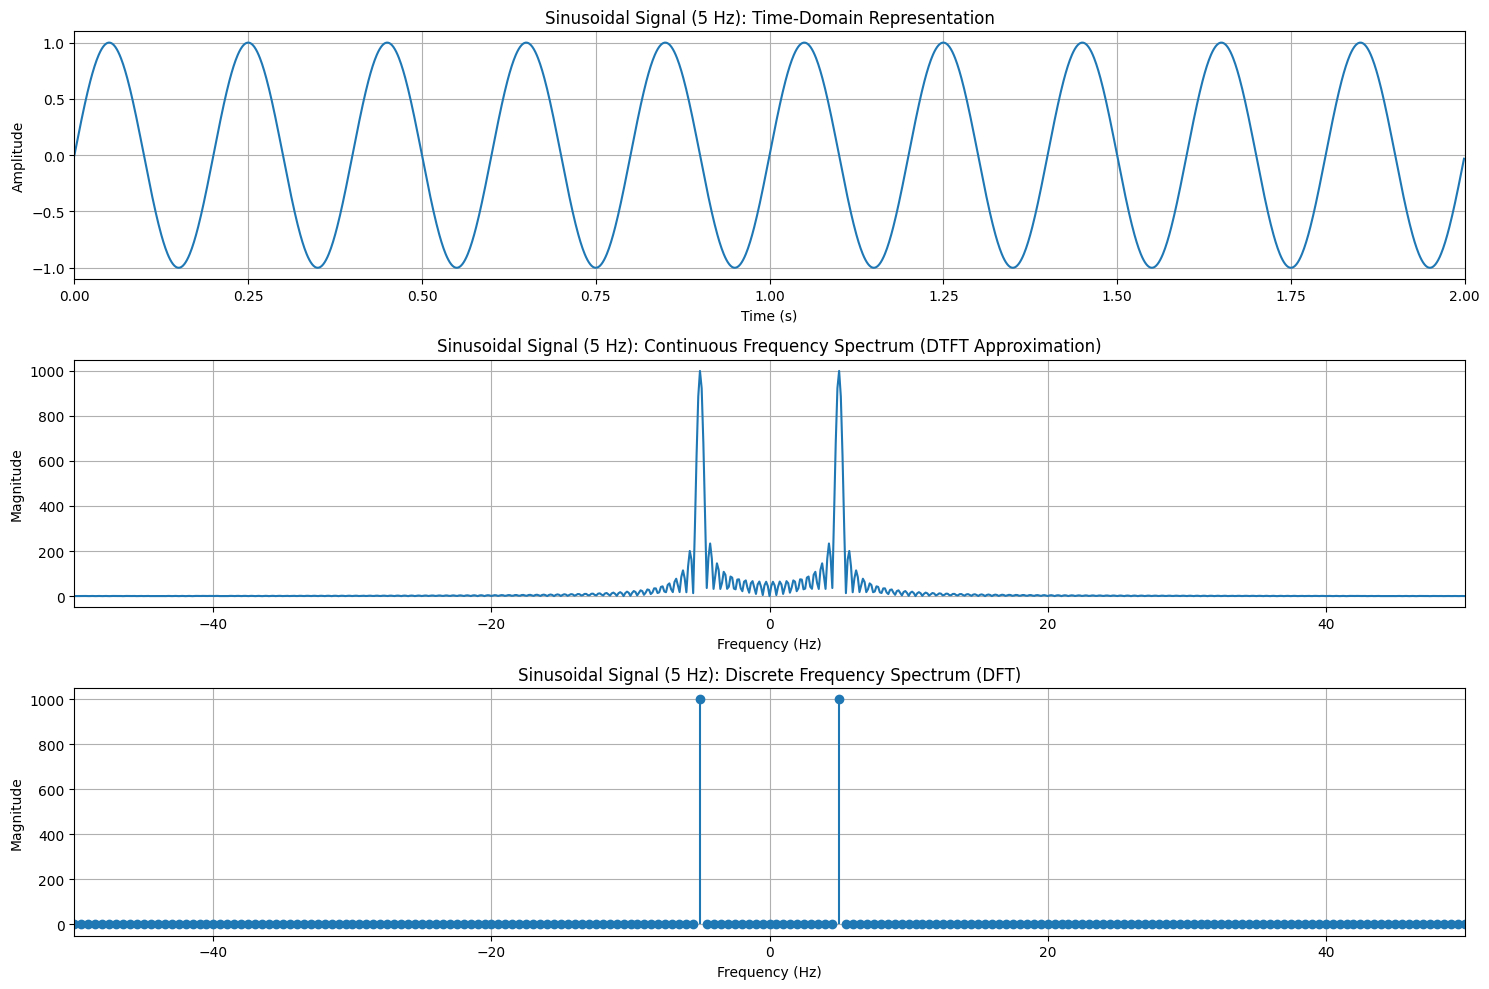

In [2]:
# ==============================================================================
# Question 1: Sinusoidal Signal
# ==============================================================================
print("--- Question 1: Sinusoidal Signal ---")
# (a) Generate a sinusoidal signal
f_sinusoidal = 5  # Hz
sinusoidal_signal = np.sin(2 * np.pi * f_sinusoidal * t)

# (b, c, d) Plot time-domain, DTFT, and DFT
plot_signal_and_spectrum(t, sinusoidal_signal, SAMPLING_RATE, "Sinusoidal Signal (5 Hz)")


--- Question 2: Composite Signal ---


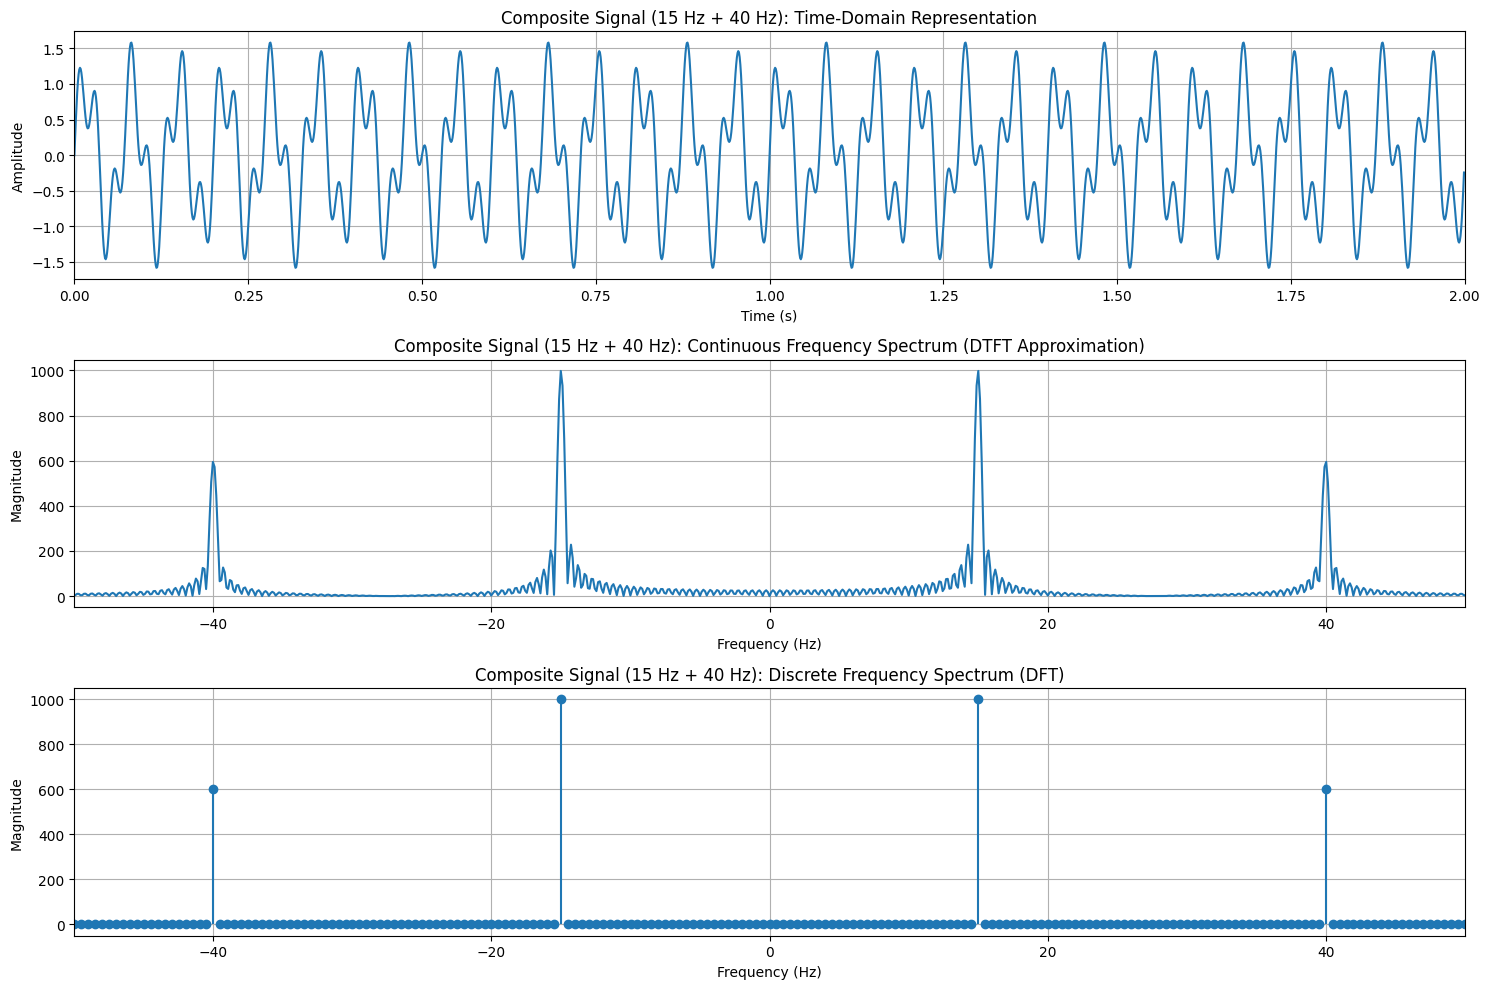

In [3]:
# ==============================================================================
# Question 2: Composite Signal
# ==============================================================================
print("\n--- Question 2: Composite Signal ---")
# (a) Generate a composite signal (sum of two sinusoids)
f1, A1 = 15, 1.0   # Frequency 1, Amplitude 1
f2, A2 = 40, 0.6   # Frequency 2, Amplitude 2
composite_signal = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t)

# (b, c, d) Plot time-domain, DTFT, and DFT
plot_signal_and_spectrum(t, composite_signal, SAMPLING_RATE, "Composite Signal (15 Hz + 40 Hz)")


--- Question 3: Exponentially Decaying Signal ---


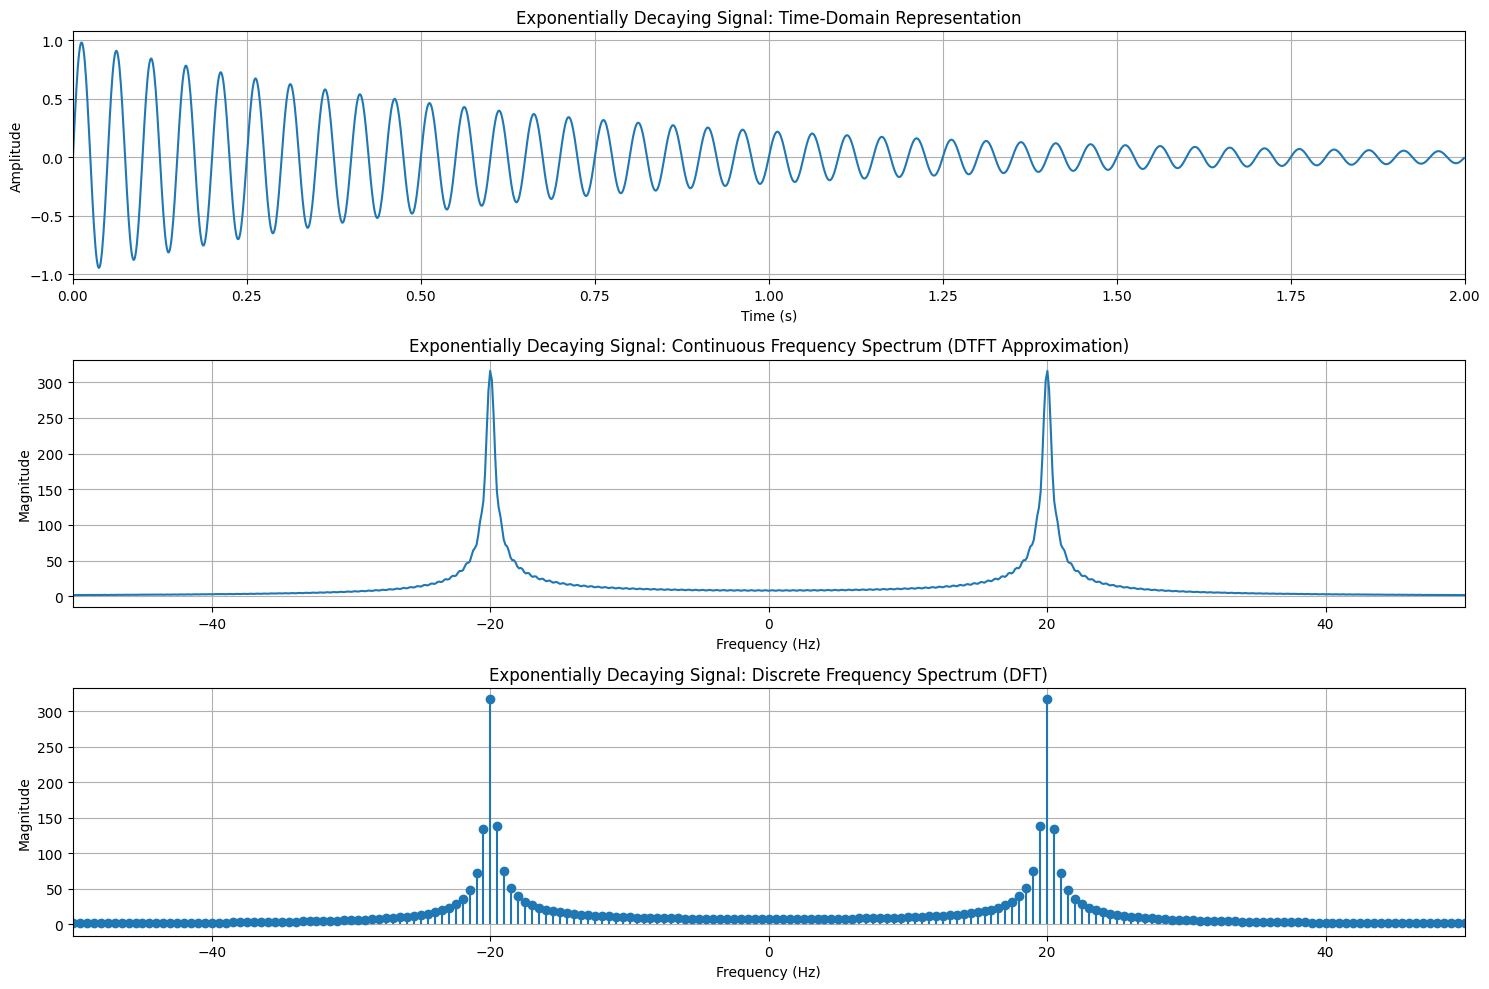


### Analysis for Exponentially Decaying Signal ###
The time-domain signal starts with a high amplitude and decays over time.
In the frequency domain, instead of two sharp peaks at +/- 20 Hz (like a pure sine wave), we see a 'spread' or 'smearing' of the frequency content around +/- 20 Hz.
This illustrates the time-frequency uncertainty principle: because the signal is more localized in time (it effectively dies out), its frequency representation becomes less localized (more spread out). 
The faster the decay in the time domain, the wider the spread in the frequency domain.



In [7]:
# ==============================================================================
# Question 3: Exponentially Decaying Signal
# ==============================================================================
print("\n--- Question 3: Exponentially Decaying Signal ---")
# (a) Generate an exponentially decaying signal
decay_rate = 1.5
frequency_exp = 20 # Hz
# We multiply a sine wave by a decaying exponential
exponential_signal = np.exp(-decay_rate * t) * np.sin(2 * np.pi * frequency_exp * t)

# (b, c, d) Plot time-domain, DTFT, and DFT
plot_signal_and_spectrum(t, exponential_signal, SAMPLING_RATE, "Exponentially Decaying Signal")

# (e) Analysis of the Exponential Signal
print("""
### Analysis for Exponentially Decaying Signal ###
The time-domain signal starts with a high amplitude and decays over time.
In the frequency domain, instead of two sharp peaks at +/- 20 Hz (like a pure sine wave), we see a 'spread' or 'smearing' of the frequency content around +/- 20 Hz.
This illustrates the time-frequency uncertainty principle: because the signal is more localized in time (it effectively dies out), its frequency representation becomes less localized (more spread out).
The faster the decay in the time domain, the wider the spread in the frequency domain.
""")


--- Question 4: Rectangular Pulse Signal ---


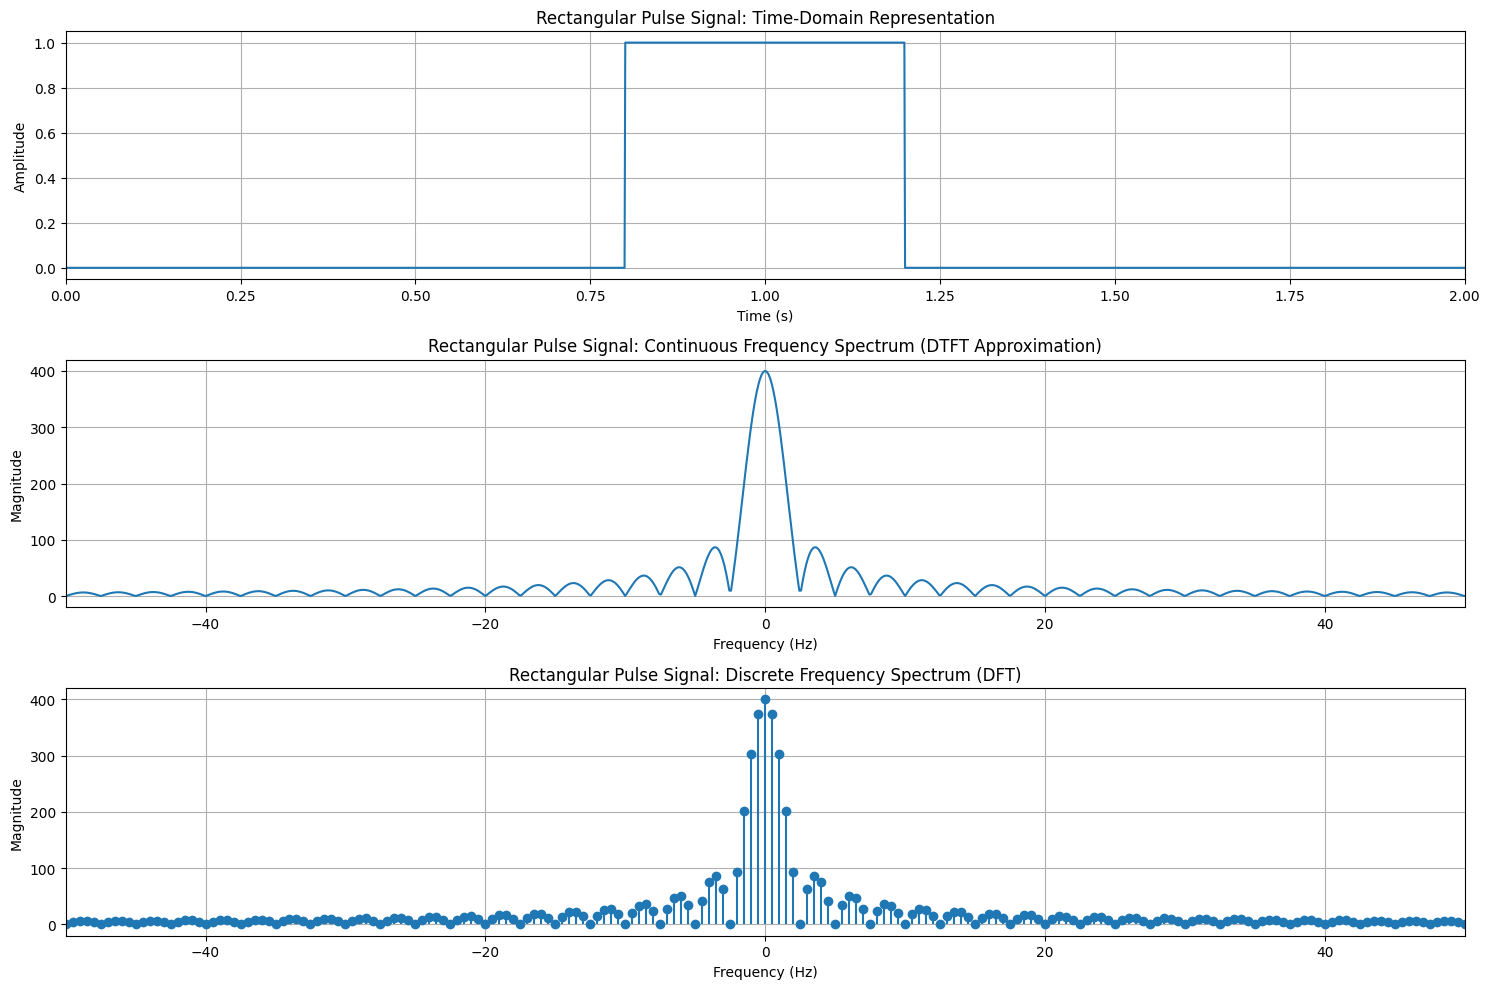


### Analysis for Rectangular Pulse Signal ###
The time-domain signal is a simple 'on-off' pulse.
Its frequency-domain representation is the sinc function, characterized by a large central lobe and smaller side lobes that diminish in amplitude.
The width of the central lobe in the frequency domain is inversely proportional to the duration (width) of the pulse in the time domain. 
A shorter pulse would result in a wider central lobe, again demonstrating the time-frequency uncertainty principle. 
The sharp transitions (edges) of the rectangle in the time domain are what create the infinite-frequency content seen as side lobes.



In [6]:
# ==============================================================================
# Question 4: Rectangular Pulse Signal
# ==============================================================================
print("\n--- Question 4: Rectangular Pulse Signal ---")
# (a) Generate a rectangular pulse signal
rectangular_signal = np.zeros(N_SAMPLES)
# Make the pulse from t=0.8s to t=1.2s
pulse_start_index = int(0.8 * SAMPLING_RATE)
pulse_end_index = int(1.2 * SAMPLING_RATE)
rectangular_signal[pulse_start_index:pulse_end_index] = 1.0

# (b, c, d) Plot time-domain, DTFT, and DFT
plot_signal_and_spectrum(t, rectangular_signal, SAMPLING_RATE, "Rectangular Pulse Signal")

# (e) Analysis of the Rectangular Signal
print("""
### Analysis for Rectangular Pulse Signal ###
The time-domain signal is a simple 'on-off' pulse.
Its frequency-domain representation is the sinc function, characterized by a large central lobe and smaller side lobes that diminish in amplitude.
The width of the central lobe in the frequency domain is inversely proportional to the duration (width) of the pulse in the time domain.
A shorter pulse would result in a wider central lobe, again demonstrating the time-frequency uncertainty principle.
The sharp transitions (edges) of the rectangle in the time domain are what create the infinite-frequency content seen as side lobes.
""")